# Fuzzy C-Means Clustering

Fuzzy logic principles can be used to cluster multidimensional data, assigning each point a membership in each cluster center from 0 to 100 percent. This can be very powerful compared to traditional hard-thresholded clustering where every point is assigned a crisp, exact label.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
%matplotlib inline

## Data Generation and Setup

In [2]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

In [3]:
# Define three cluster centers
centers = [[4, 2],[1, 7],[5, 6]]

In [4]:
# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],[0.3, 0.5],[1.1, 0.7]]

In [5]:
# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

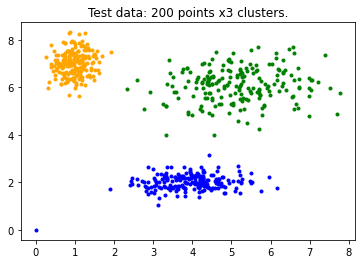

In [6]:
# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

# <font color='red'>Clustering</font>

Usefull to see how many clusters our data can be divided.

Use the <b>fuzz.cluster.cmeans</b> as we can se below:

#### Find all the FCP's for all the data

In [7]:
# Set up the loop and plot
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters in range(2,10):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

## Fuzzy Partition Coefficient

The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric which tells us how cleanly our data is described by a certain model. Next we will cluster our set of data - which we know has three clusters - several times, with between 2 and 9 clusters. We will then show the results of the clustering, and plot the fuzzy partition coefficient. <b>When the FPC is maximized, our data is described best.</b>

Text(0, 0.5, 'Fuzzy partition coefficient')

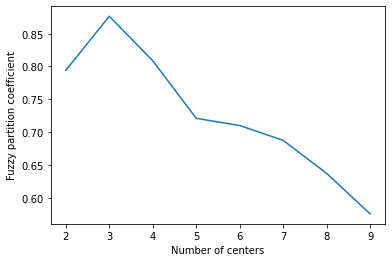

In [8]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:10], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

# <font color='red'>Build The Model </font>

We know our best model has three cluster centers. We’ll rebuild a 3-cluster model for use in prediction, generate new uniform data, and predict which cluster to which each new data point belongs.

#### Defining the Fuzzy Model

In [9]:
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(alldata, 3, 2, error=0.005, maxiter=1000)

#### Plot The Model

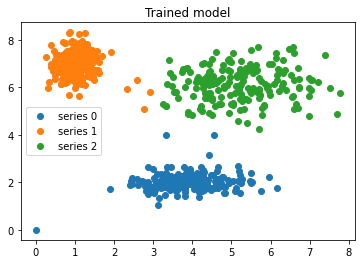

In [10]:
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

# <font color='red'>Make Predictions</font>

In [11]:
# Generate uniformly sampled data spread across the range [0, 10] in x and y
newdata = np.random.uniform(0, 1, (1100, 2)) * 10

In [12]:
# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(newdata.T, cntr, 2, error=0.005, maxiter=1000)


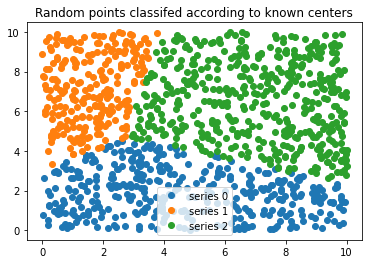

In [13]:
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization (the maximum membership value has been taken at each point)

fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(3):
    ax3.plot(newdata[cluster_membership == j, 0], newdata[cluster_membership == j, 1], 'o', label='series ' + str(j))
ax3.legend()

plt.show()